<a href="https://colab.research.google.com/github/katiyarlokesh/Malicious-node-detection-in-wireless-network/blob/main/ANN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importing the Dataset
dataset = pd.read_csv('Update-Detaset with hacking1.csv')
dataset.head(10)

,Date,Time,Period Time,Previous captured frame,Previous displayed frame,Time Since Reference,Payload length,Total Length,Output
0,27-Oct-18,19:05.1,1540631945,0.186248,0.000000,17.332187,183,203,0
1,27-Oct-18,19:08.1,1540631948,0.064265,2.965492,20.297679,183,203,0
2,27-Oct-18,19:08.1,1540742048,0.065365,2.965492,20.297679,183,203,1
3,27-Oct-18,19:11.1,1540631951,3.070094,3.070094,23.367773,183,203,0
4,27-Oct-18,19:14.1,1540631954,0.111239,2.967332,26.335105,183,203,0
5,27-Oct-18,19:14.1,1540631954,0.111239,2.967332,26.335105,184,204,1
6,27-Oct-18,19:17.1,1540631957,0.368913,2.980910,29.316015,183,203,0
7,27-Oct-18,19:20.1,1540631960,0.410800,3.058435,32.374450,183,203,0
8,27-Oct-18,19:20.1,1540631960,0.510800,3.258435,32.374450,183,203,1
9,27-Oct-18,19:23.1,1540631963,2.269537,2.980769,35.355219,183,203,0


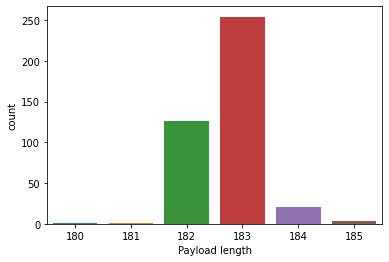

In [ ]:
sns.countplot(x='Payload length',data=dataset)

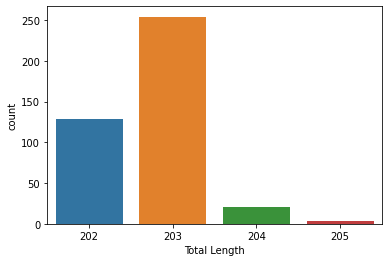

In [ ]:
sns.countplot(x='Total Length',data=dataset)

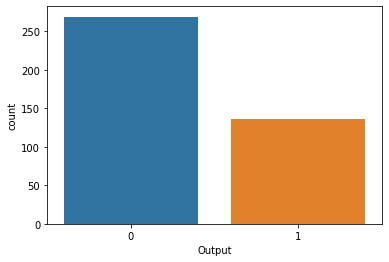

In [ ]:
sns.countplot(x='Output',data=dataset)

In [ ]:
dataset['Output'].value_counts()

0    269
1    136
Name: Output, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      405 non-null    object 
 1   Time                      405 non-null    object 
 2   Period Time               405 non-null    int64  
 3   Previous captured frame   405 non-null    float64
 4   Previous displayed frame  405 non-null    float64
 5   Time Since Reference      405 non-null    float64
 6   Payload length            405 non-null    int64  
 7   Total Length              405 non-null    int64  
 8   Output                    405 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.6+ KB


In [ ]:
y=[]
X = dataset.iloc[:,2:7]
y = dataset.iloc[:,8].values


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [ ]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
Y = np.reshape(y,(-1,1))
imputer = imputer.fit(Y)
Y= imputer.transform(Y)

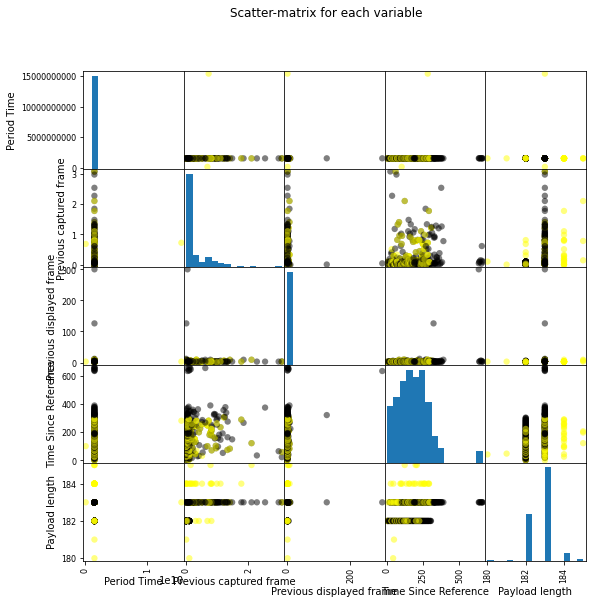

In [ ]:
#from pandas.plotting import scatter_matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix
#feature_names = ['x', 'xa', 'xs', 'xd']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each variable')
#plt.figure(figsize=(16, 16), dpi=80)
plt.savefig('pic.png')
plt.show()

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Artficial Neural Network

In [ ]:
import keras

In [ ]:
from keras.models import Sequential 

In [ ]:
# Importing the Keras libraries and packages
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential() 

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=5, units=8, kernel_initializer="uniform"))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=4, kernel_initializer="uniform"))


In [ ]:
# Adding the third hidden layer
classifier.add(Dense(activation="relu", units=2, kernel_initializer="uniform"))


In [ ]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, epochs=1500, batch_size=10) 

Epoch 1/1500
33/33 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.6574
Epoch 2/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6605
Epoch 3/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6605
Epoch 4/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.6605
Epoch 5/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.6605
Epoch 6/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6605
Epoch 7/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6605
Epoch 8/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6605
Epoch 9/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6605
Epoch 10/1500
33/33 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6605

# Making the predictions and evaluating the model

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.4)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  0]
 [26  0]]


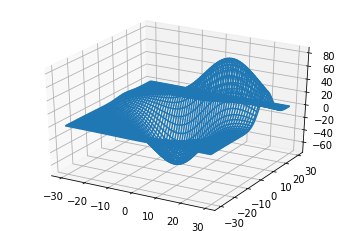

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

'''
def get_test_data(delta=0.05):

    from matplotlib.mlab import  bivariate_normal
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    Z = Z2 - Z1

    X = X * 10
    Y = Y * 10
    Z = Z * 500
    return X, Y, Z

'''


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = axes3d.get_test_data(0.05)
ax.plot_wireframe(x,y,z, rstride=2, cstride=2)
plt.savefig('2D.png')
plt.show()